
 HYDROGEN EMISSION CALCULATIONS AND PLOT 

Wavelength(nm), Frequency(Hz)
    657.00, 6.5700e+02
    486.00, 4.8600e+02
    434.00, 4.3400e+02
    410.00, 4.1000e+02

Determining best fit line... 

R-squared: 0.768213
Slope: -8.365526e+00
y = -8.3655e+00 x

 LITHIUM and SODIUM EMISSION CALCULATIONS 

Wavelength(nm), E mol photons(kJ/mol)
    670.00,     670.00
    590.00,     590.00
    820.00,     820.00


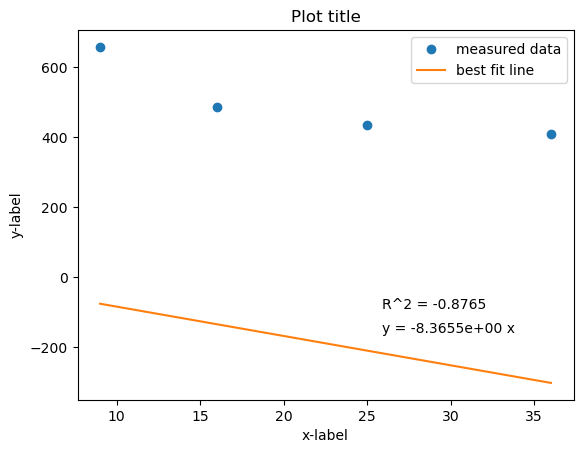

In [2]:
import numpy
import scipy
import matplotlib.pyplot as plt
from scipy import stats

# Constants we need for our calculations
# These also provide an example of how multiplication and exponents work in Python
c = 2.9979 * 10 ** 8 # speed of light in m/s 
h = 6.6261 * 10 ** -34  # Planck's constant in J*s  
mol = 6.0221 * 10 ** 23  # Avogradro's number


#### HYDROGEN EMISSION CALCULATIONS AND PLOT
print("\n HYDROGEN EMISSION CALCULATIONS AND PLOT \n")

# Set up empty arrays that we will populate with our measured data
wavelengths = [] 
frequencies = []

# Read in the wavelengths from the txt file 
H_atom_file = ('LAB_2.H_emission_wavelengths.txt')  
outfile = open(H_atom_file,"r")
data = outfile.readlines()
outfile.close()

# Convert wavelength to frequencies
for value in data: 
    wavelength = float(value)
    wavelengths.append(wavelength)
    # set up the equation to convert wavelengths to frequency (also wavelength nm to m!), below is just a placeholder
    frequency = wavelength
    frequencies.append(frequency) 


#print(wavelengths)
#print(frequencies)
#for value in frequencies: 
#    print("%10.4E" % (value))

# Set up Balmer series for x-axis of plot
# The equation below is incorrect and you should fix it!
# Balmer series includes transitions to n=2, starting at n=3
Balmer_gaps = []
for i in range(3,len(wavelengths)+3):
    #print(i)
    Balmer_gap = i ** 2
    Balmer_gaps.append(Balmer_gap)
    
#print(Balmer_gaps)
#for value in Balmer_gaps: 
#    print("%1.5f" % (value))

print("Wavelength(nm), Frequency(Hz)")
for i in range(0,len(wavelengths)):
    print("%10.2f, %10.4e" % (wavelengths[i], frequencies[i]))

print("\nDetermining best fit line... \n")
# Use linear regression to determine the best fit line
fit = stats.linregress(Balmer_gaps, frequencies)
print(f"R-squared: {fit.rvalue**2:.6f}")
print(f"Slope: {fit.slope:.6e}")
R_text = f"R^2 = {fit.rvalue:.4f}"
eqn_text = f"y = {fit.slope:.4e} x"
print(eqn_text)#$print(f"Equation of the fit: {fit.slope:.6e}")
#print(fit.slope)
#print(fit.intercept)

# Use slope from the fit to determine the fitted values for the plot
fit_Balmer_gaps = []
for value in Balmer_gaps:
    fit_Balmer_gap = fit.slope * value
    fit_Balmer_gaps.append(fit_Balmer_gap)


# Plot your data
# Change the text to represent the proper x and y axes values, and change the title
plt.figure()
plt.xlabel('x-label')
plt.ylabel('y-label')
plt.title("Plot title")
plt.plot(Balmer_gaps,frequencies, 'o', label='measured data')
plt.plot(Balmer_gaps,fit_Balmer_gaps, '-', label='best fit line')
plt.legend()
#adding text inside the plot
plt.figtext(0.6, 0.25, eqn_text)
plt.figtext(0.6, 0.3, R_text)
#plt.show()
plt.savefig('LAB_2.H_atom_emission.png')


#### LITHIUM and SODIUM EMISSION CALCULATIONS
print("\n LITHIUM and SODIUM EMISSION CALCULATIONS \n")

# Read in the wavelengths from the txt file 
Li_Na_atom_file = ('LAB_2.Li_Na_emission_wavelengths.txt')
outfile = open(Li_Na_atom_file,"r")
data = outfile.readlines()
outfile.close()

wavelengths = [] # Need to reset the array to be empty
energies_kJ_mol = []
# Convert wavelength to kJ/mol
for value in data: 
    wavelength = float(value)
    wavelengths.append(wavelength)
    # set up the equation to convert wavelengths to frequency (also wavelength nm to m!), below is just a placeholder
    energy_kJ_mol = wavelength 
    energies_kJ_mol.append(energy_kJ_mol) 
    
#print(wavelengths)
#print(energies_kJ_mol)
print("Wavelength(nm), E mol photons(kJ/mol)")
for i in range(0,len(wavelengths)):
    print("%10.2f, %10.2f" % (wavelengths[i], energies_kJ_mol[i]))